# Final Project
In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be price column. Do not forget, this is a Classification problem!

# Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

# Steps
Read the diamonds.csv file and describe it.
Make at least 4 different analysis on Exploratory Data Analysis section.
Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
Define appropriate evaluation metric for our case (classification). Hint: Is there any imbalanced problem in the label column?
Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
Analyse and compare results of 3 algorithms.
Select best performing model based on evaluation metric you chose on test dataset.
Good luck :)


# Alper Tavukçu


# Data

In [93]:
import pandas as pd  # Gerekli kütüphaneler import edildi
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [113]:
data = pd.read_csv("https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/diamonds.csv")
data.head() # data belirli kaynaktan çekildi

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low


In [114]:
data.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [115]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]
data.describe() # bir elmasın boyutu 0 olamayacağı için 0 olan rowlar silindi

,index,carat,depth,table,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53920 non-null  int64  
 1   carat    53920 non-null  float64
 2   cut      53920 non-null  object 
 3   color    53920 non-null  object 
 4   clarity  53920 non-null  object 
 5   depth    53920 non-null  float64
 6   table    53920 non-null  float64
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
 10  price    53920 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.9+ MB


In [117]:
data.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Exploratory Data Analysis

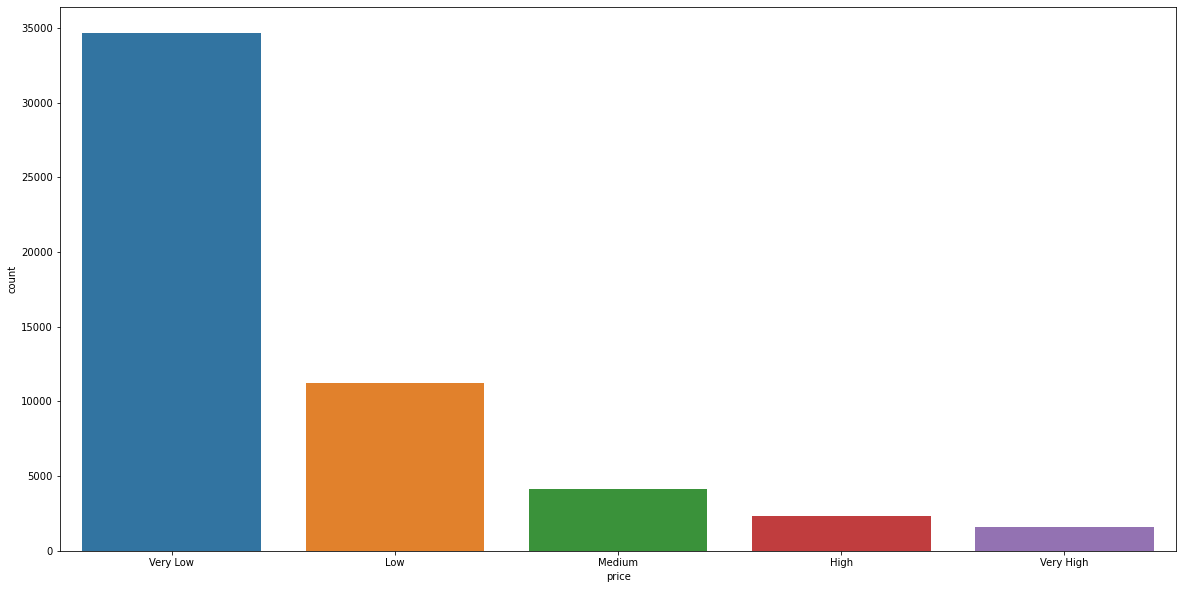

In [118]:
sns.countplot(x = "price", data = data) # Verilerin price sütünuna göre dağılımına bakıldı ve Very Lowun çok yüksek olduğu gözlemlendi

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


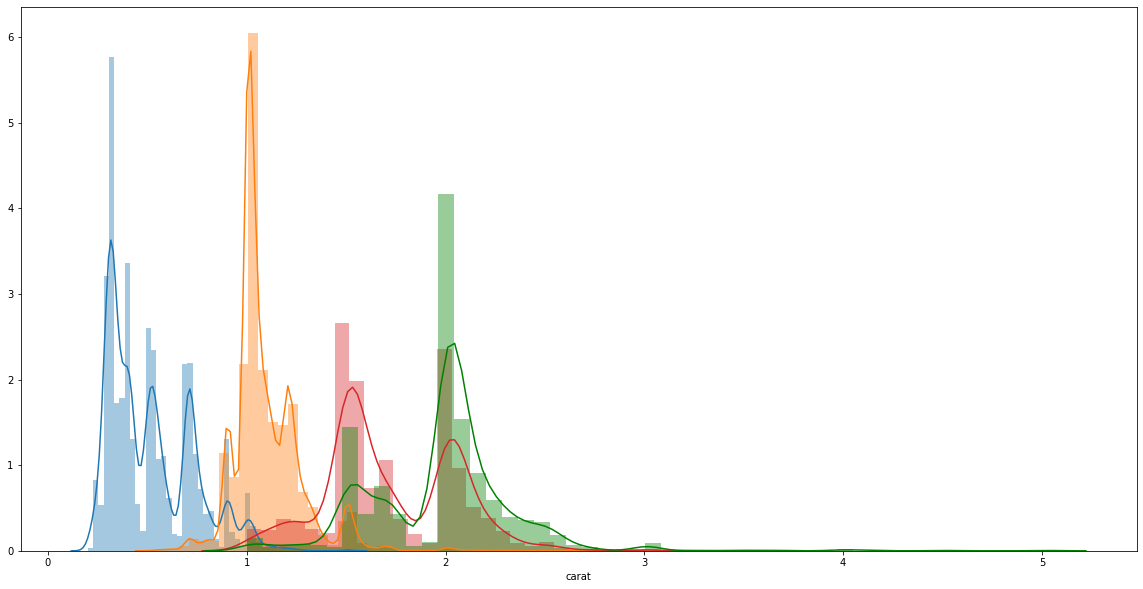

In [119]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) # Carat featuresine göre kategorilerin dağılımına bakıldı.
sns.distplot(data[data.price == "Very Low"].carat)
sns.distplot(data[data.price == "Low"].carat)
sns.distplot(data[data.price == "Medium price"].carat)
sns.distplot(data[data.price == "High"].carat)
sns.distplot(data[data.price == "Very High"].carat,color="g")

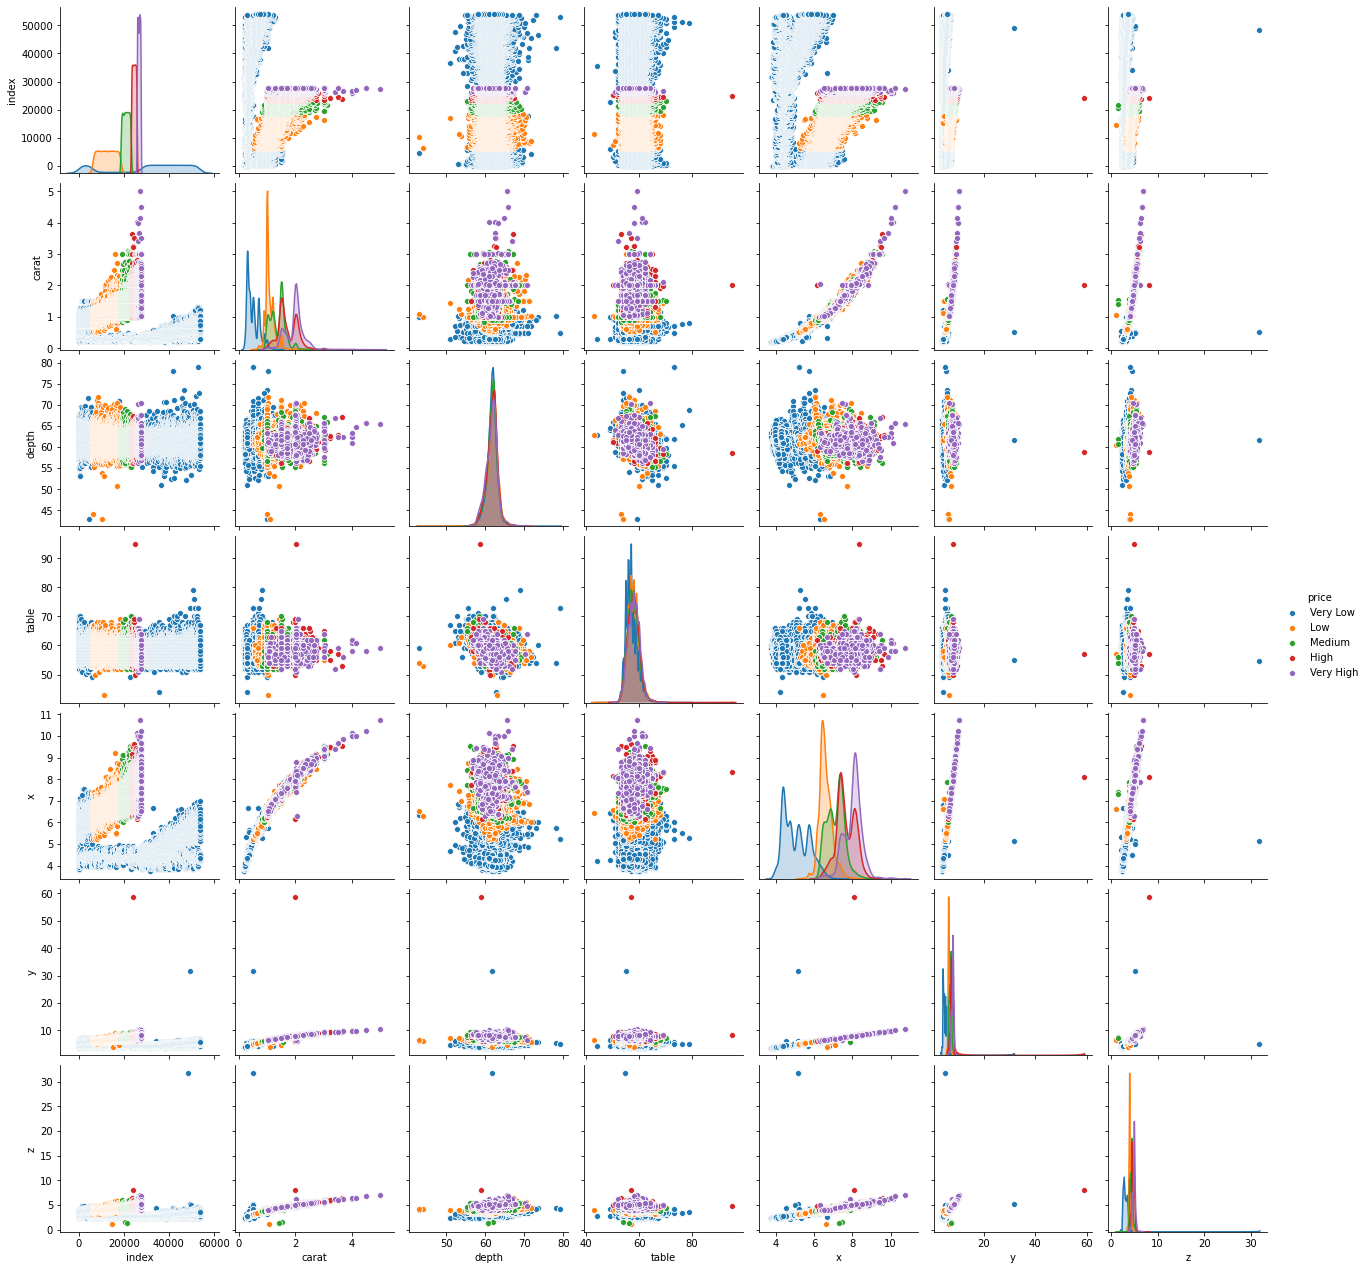

In [59]:
sns.pairplot(data, hue="price")

In [120]:
data["labels"] = pd.factorize(data["price"],sort = False)[0]#  String verilere label encoder uygulandı
data["cut"] = pd.factorize(data["cut"],sort = False)[0]
data["color"] = pd.factorize(data["color"],sort = False)[0]
data["depth"] = pd.factorize(data["depth"],sort = False)[0]
data["clarity"] = pd.factorize(data["clarity"],sort = False)[0]
data.drop(["price","index"],axis = 1,inplace =True)

data.head()

,carat,cut,color,clarity,depth,table,x,y,z,labels
0,0.23,0,0,0,0,55.0,3.95,3.98,2.43,0
1,0.21,1,0,1,1,61.0,3.89,3.84,2.31,0
2,0.23,2,0,2,2,65.0,4.05,4.07,2.31,0
3,0.29,1,1,3,3,58.0,4.20,4.23,2.63,0
4,0.31,2,2,0,4,58.0,4.34,4.35,2.75,0


In [121]:
data["labels"].value_counts()

0    34656
1    11266
2     4109
3     2306
4     1583
Name: labels, dtype: int64

In [127]:
data.drop_duplicates(keep = False, inplace = True) # Duplicate veriler silindi.
data.duplicated().sum()

0

In [128]:
from sklearn.ensemble import IsolationForest 
forest_model= IsolationForest(random_state = 42)
forest_model.fit(data)

IsolationForest(random_state=42)

In [129]:
pred = forest_model.predict(data) # Outliersler belirlendi ve datadan silindi
data['anomaly']=pred
outliers=data.loc[data['anomaly']==-1]
outlier_index=list(outliers.index)
data['anomaly'].value_counts()

 1    39997
-1    13246
Name: anomaly, dtype: int64

In [130]:
new_data = data[data.anomaly == 1]
new_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,labels,anomaly
3,0.29,1,1,3,3,58.0,4.20,4.23,2.63,0,1
10,0.30,2,2,1,10,55.0,4.25,4.28,2.73,0,1
17,0.30,2,2,1,16,54.0,4.23,4.29,2.70,0,1
18,0.30,2,2,1,17,56.0,4.23,4.26,2.71,0,1
19,0.30,3,2,1,18,59.0,4.21,4.27,2.66,0,1


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


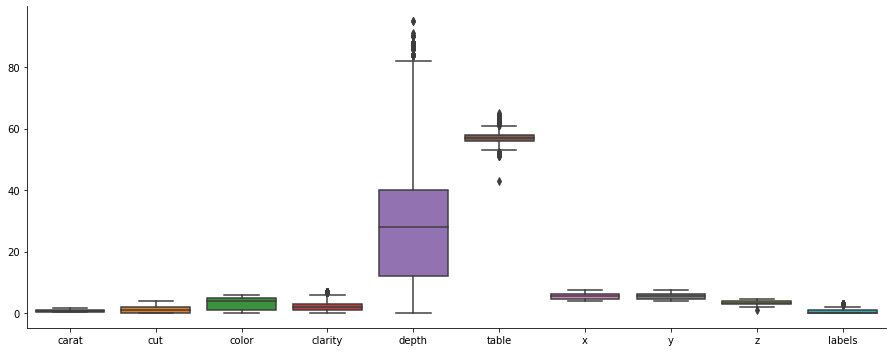

In [106]:
new_data.drop(["anomaly"],axis = 1,inplace =True)
sns.factorplot(data=new_data , kind='box' , size=5, aspect=2.5)

In [131]:
new_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,labels,anomaly
3,0.29,1,1,3,3,58.0,4.20,4.23,2.63,0,1
10,0.30,2,2,1,10,55.0,4.25,4.28,2.73,0,1
17,0.30,2,2,1,16,54.0,4.23,4.29,2.70,0,1
18,0.30,2,2,1,17,56.0,4.23,4.26,2.71,0,1
19,0.30,3,2,1,18,59.0,4.21,4.27,2.66,0,1


In [132]:
new_data.duplicated().sum()

0

In [149]:
X, y = new_data.iloc[: , :-2], new_data.iloc[: , -2] # Data x ve y formatına ayrıldı
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
3,0.29,1,1,3,3,58.0,4.20,4.23,2.63
10,0.30,2,2,1,10,55.0,4.25,4.28,2.73
17,0.30,2,2,1,16,54.0,4.23,4.29,2.70
18,0.30,2,2,1,17,56.0,4.23,4.26,2.71
19,0.30,3,2,1,18,59.0,4.21,4.27,2.66


In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [160]:
from imblearn.over_sampling import SMOTE # Data imbalanced olduğu için Smote oversampling methodu uygulandı.
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [174]:
from sklearn.tree import DecisionTreeClassifier  # Gerekli modeller tanımlandı
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model_dec = DecisionTreeClassifier(max_depth = 7, random_state = 42)
model_log = LogisticRegression(random_state = 42)
model_rand = RandomForestClassifier(n_estimators= 100, max_depth = 7, n_jobs = -1,random_state = 42 )

In [175]:
model_dec.fit(X_train,y_train)
model_log.fit(X_train,y_train)
model_rand.fit(X_train,y_train)

pred_dec = model_dec.predict(X_test)
pred_log = model_log.predict(X_test)
pred_rand = model_rand.predict(X_test)

print("DecisionTreeClassifier accuracy of train:",model_dec.score(X_train,y_train))
print("DecisionTreeClassifier accuracy of test:",model_dec.score(X_test,y_test))

print("LogisticRegression accuracy of train:",model_log.score(X_train,y_train))
print("LogisticRegression accuracy of test:",model_log.score(X_test,y_test))

print("RandomForestClassifier accuracy of train:",model_rand.score(X_train,y_train))
print("RandomForestClassifier accuracy of test:",model_rand.score(X_test,y_test))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier accuracy of train: 0.9254862842892768
DecisionTreeClassifier accuracy of test: 0.9245833333333333
LogisticRegression accuracy of train: 0.8318952618453865
LogisticRegression accuracy of test: 0.86775
RandomForestClassifier accuracy of train: 0.9310847880299252
RandomForestClassifier accuracy of test: 0.9241666666666667


In [178]:
from sklearn.metrics import confusion_matrix
for i in [pred_dec,pred_log,pred_rand]:
    print(confusion_matrix(y_test, i))
    print("***************************")

[[8191  463    0    0]
 [  62 2533  302    2]
 [   0   35  354   40]
 [   0    0    1   17]]
***************************
[[7975  671    8    0]
 [ 186 2163  505   45]
 [   0   49  259  121]
 [   0    0    2   16]]
***************************
[[8172  482    0    0]
 [  60 2548  291    0]
 [   0   39  353   37]
 [   0    0    1   17]]
***************************


In [179]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print("Precision for DecisionTreeClassifier = ",precision_score(y_test, pred_dec, average='macro'))
print("Recall for DecisionTreeClassifier = ", recall_score(y_test, pred_dec, average='macro'))
print("Accuracy for DecisionTreeClassifier = ", accuracy_score(y_test, pred_dec))
print("F1 Score for DecisionTreeClassifier = ", f1_score(y_test, pred_dec,average='macro'))
print("*********************************")

print("Precision for LogisticRegression = ",precision_score(y_test, pred_log, average='macro'))
print("Recall for LogisticRegression = ", recall_score(y_test, pred_log, average='macro'))
print("Accuracy for LogisticRegression = ", accuracy_score(y_test, pred_log))
print("F1 Score for LogisticRegression = ", f1_score(y_test, pred_log,average='macro'))
print("*********************************")
print("Precision for RandomForestClassifier = ",precision_score(y_test, pred_rand, average='macro'))
print("Recall for RandomForestClassifier = ", recall_score(y_test, pred_rand, average='macro'))
print("Accuracy for RandomForestClassifier = ", accuracy_score(y_test, pred_rand))
print("F1 Score for RandomForestClassifier = ", f1_score(y_test, pred_rand,average='macro'))



Precision for DecisionTreeClassifier =  0.66378343709768
Recall for DecisionTreeClassifier =  0.8974668918368973
Accuracy for DecisionTreeClassifier =  0.9245833333333333
F1 Score for DecisionTreeClassifier =  0.7291850212404233
*********************************
Precision for LogisticRegression =  0.5375015579996278
Recall for LogisticRegression =  0.7900692541889852
Accuracy for LogisticRegression =  0.86775
F1 Score for LogisticRegression =  0.5718330114563217
*********************************
Precision for RandomForestClassifier =  0.6712627173196397
Recall for RandomForestClassifier =  0.8976288116229365
Accuracy for RandomForestClassifier =  0.9241666666666667
F1 Score for RandomForestClassifier =  0.7378419264366795


Modellerin hiçbirinde overfitting veya underfitting gözlemlenmedi. RandomForestClassifier tüm skor metrikleri baz alındığında en iyi sonucu verdi ve ayrıca veri eşit dağılmamış bir veri olduğu için F1 Skora baktım ve en yüksek skor  0.738 ile RandomForestClassifier' ın oldu. Fakat verinin kötü dağılmış olması sebebiyle precision skoru çok düşük geldi. Bununla nasıl başa çıkacağımı açıkçası bulamadım.
Modelin sonuçlarının daha iyi çıkması için kötü dağılmış veri ile başa çıkmak lazım.